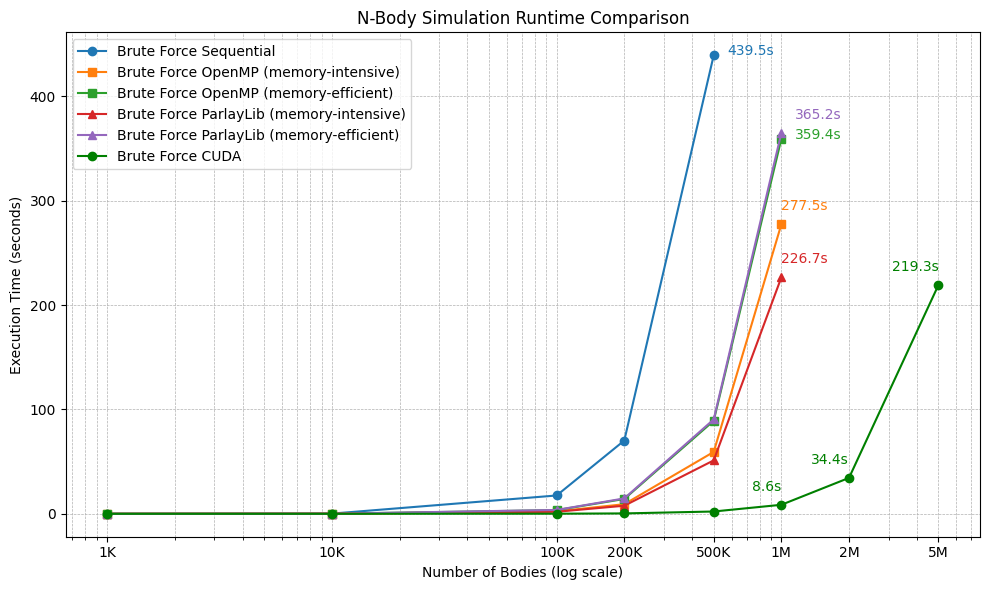

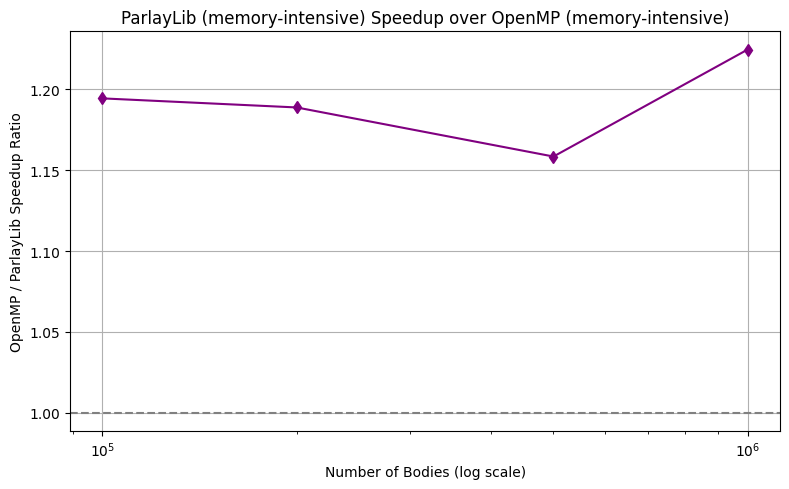

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# One-shot results (redo with averages later)
# X-axis: number of bodies
x = [1000, 10000, 100000, 200000, 500000, 1000000, 2000000, 5000000]
# Y-axis: execution time in seconds
y_brute_force_seq = [0.001761, 0.1756891, 17.5546, 70.231, 439.53]
y_brute_force_omp_1 = [0.000769, 0.028328, 2.32016, 9.19307, 59.324, 277.54]
y_brute_force_omp_2 = [0.000362, 0.035413, 3.53851, 14.2024, 89.1468, 359.414]
y_brute_force_parlay_1 = [0.00239, 0.150223, 1.94279, 7.73413, 51.2151, 226.671]
y_brute_force_parlay_2 = [0.0025, 0.037558, 3.67021, 14.7623, 90.5047, 365.159]
y_brute_force_cuda = [0.000448512, 0.00565258, 0.0993744, 0.361864, 2.19412, 8.64006, 34.4182, 219.31]

plt.figure(figsize=(10, 6))
plt.plot(x[:5], y_brute_force_seq, "o-", label="Brute Force Sequential")
plt.plot(x[:6], y_brute_force_omp_1, "s-", label="Brute Force OpenMP (memory-intensive)")
plt.plot(x[:6], y_brute_force_omp_2, "s-", label="Brute Force OpenMP (memory-efficient)")
plt.plot(x[:6], y_brute_force_parlay_1, "^-", label="Brute Force ParlayLib (memory-intensive)")
plt.plot(x[:6], y_brute_force_parlay_2, "^-", label="Brute Force ParlayLib (memory-efficient)")
plt.plot(x, y_brute_force_cuda, "o-", label="Brute Force CUDA", color="green")

for i in [5, 6, 7]:
    plt.annotate(f"{y_brute_force_cuda[i]:.1f}s", 
                 (x[i], y_brute_force_cuda[i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha="right",
                 color="green")

plt.annotate(f"{y_brute_force_parlay_1[-1]:.1f}s", 
             (x[5], y_brute_force_parlay_1[-1]),
             textcoords="offset points",
             xytext=(0,10),
             ha="left",
             color="#d62728")

plt.annotate(f"{y_brute_force_omp_1[-1]:.1f}s", 
             (x[5], y_brute_force_omp_1[-1]),
             textcoords="offset points",
             xytext=(0,10),
             ha="left",
             color="#ff7f0e")


plt.annotate(f"{y_brute_force_seq[-1]:.1f}s", 
             (x[4], y_brute_force_seq[-1]),
             textcoords="offset points",
             xytext=(10,0),
             ha="left",
             color="#1f77b4")

plt.annotate(f"{y_brute_force_omp_2[-1]:.1f}s", 
             (x[5], y_brute_force_omp_2[-1]),
             textcoords="offset points",
             xytext=(10,0),
             ha="left",
             color="#2ca02c")

plt.annotate(f"{y_brute_force_parlay_2[-1]:.1f}s", 
             (x[5], y_brute_force_parlay_2[-1]),
             textcoords="offset points",
             xytext=(10,10),
             ha="left",
             color="#9467bd")


plt.xscale("log")
plt.xticks(x, ["1K", "10K", "100K", "200K", "500K", "1M", "2M", "5M"])
plt.xlabel("Number of Bodies (log scale)")
plt.ylabel("Execution Time (seconds)")
plt.title("N-Body Simulation Runtime Comparison")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("images/result-1.png")
plt.show()

speedup = np.array(y_brute_force_omp_1[2:6]) / np.array(y_brute_force_parlay_1[2:])
plt.figure(figsize=(8, 5))
plt.plot(x[2:6], speedup, "d-", color="purple")
plt.xscale("log")
plt.xlabel("Number of Bodies (log scale)")
plt.ylabel("OpenMP / ParlayLib Speedup Ratio")
plt.title("ParlayLib (memory-intensive) Speedup over OpenMP (memory-intensive)")
plt.grid(True)
plt.axhline(1, color="gray", linestyle="--")
plt.tight_layout()
plt.show()